In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

연산 장치에서 GPU를 제외하여 CPU만 사용하도록 설정

In [2]:
tf.config.set_visible_devices([], device_type='GPU')

2023-02-21 04:52:11.115136: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:961] could not open file to read NUMA node: /sys/bus/pci/devices/0000:08:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-02-21 04:52:11.118645: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:961] could not open file to read NUMA node: /sys/bus/pci/devices/0000:08:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-02-21 04:52:11.118699: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:961] could not open file to read NUMA node: /sys/bus/pci/devices/0000:08:00.0/numa_node
Your kernel may have been built without NUMA support.


In [3]:
tf.config.get_visible_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]

In [4]:
a = tf.constant([1, 2, 3])

2023-02-21 04:52:11.265358: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


# Keras Model API

## Sequential Model 

In [9]:
from tensorflow import keras
from tensorflow.keras import Sequential, layers

model = keras.Sequential([
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [10]:
model = Sequential()
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

In [11]:
model.build(input_shape=(None, 784))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 64)                50240     
                                                                 
 dense_3 (Dense)             (None, 10)                650       
                                                                 
Total params: 50,890
Trainable params: 50,890
Non-trainable params: 0
_________________________________________________________________


In [12]:
model = Sequential(name="fashion_mnist")
model.add(keras.Input(shape=(784,)))
model.add(layers.Dense(64, activation='relu', name='FC1'))
model.add(layers.Dense(10, activation='softmax', name="output"))
model.summary()

Model: "fashion_mnist"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 FC1 (Dense)                 (None, 64)                50240     
                                                                 
 output (Dense)              (None, 10)                650       
                                                                 
Total params: 50,890
Trainable params: 50,890
Non-trainable params: 0
_________________________________________________________________


## Funtional API

In [13]:
inputs = keras.Input(shape=(784,), name="mnist input")
fc1 = layers.Dense(64, activation='relu', name='FC1')
fc2 = layers.Dense(64, activation='relu', name='FC2')
outputs = layers.Dense(10, activation='softmax', name="output")

features = fc1(inputs)
features = fc2(features)
outputs = outputs(features)

model = keras.Model(inputs=inputs, outputs=outputs)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mnist input (InputLayer)    [(None, 784)]             0         
                                                                 
 FC1 (Dense)                 (None, 64)                50240     
                                                                 
 FC2 (Dense)                 (None, 64)                4160      
                                                                 
 output (Dense)              (None, 10)                650       
                                                                 
Total params: 55,050
Trainable params: 55,050
Non-trainable params: 0
_________________________________________________________________


### 다중 입력, 다중 출력 모델 사례

In [14]:
def create_model(어휘수, 태그수, 부서수):
    title = keras.Input(shape=(어휘수,), name='title')
    text_body = keras.Input(shape=(어휘수,), name='text_body')
    tags = keras.Input(shape=(태그수,), name='tags')

    features = layers.Concatenate()([title, text_body, tags])
    features = layers.Dense(64, activation='relu')(features)

    우선순위 = layers.Dense(1, name='priority')(features)
    부서 = layers.Dense(부서수, activation='softmax', name='department')(features)

    model = keras.Model(inputs=[title, text_body, tags], outputs=[우선순위, 부서])
    return model

create_model(어휘수=10000, 태그수=100, 부서수=4).summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 title (InputLayer)             [(None, 10000)]      0           []                               
                                                                                                  
 text_body (InputLayer)         [(None, 10000)]      0           []                               
                                                                                                  
 tags (InputLayer)              [(None, 100)]        0           []                               
                                                                                                  
 concatenate (Concatenate)      (None, 20100)        0           ['title[0][0]',                  
                                                                  'text_body[0][0]',        

In [15]:
np.random.randint(0, 2, size=(2, 5))

array([[0, 0, 1, 0, 1],
       [0, 0, 0, 1, 1]])

In [16]:
np.random.random(size=(5, 1))

array([[0.89824089],
       [0.85180975],
       [0.701724  ],
       [0.13404012],
       [0.45602418]])

In [17]:
np.random.random?

Docstring:
random(size=None)

Return random floats in the half-open interval [0.0, 1.0). Alias for
`random_sample` to ease forward-porting to the new random API.
Type:      builtin_function_or_method

In [18]:
np.random.randint(0, 2, size=(5, 4))

array([[0, 0, 0, 1],
       [1, 0, 1, 0],
       [0, 0, 0, 1],
       [1, 1, 1, 1],
       [0, 1, 1, 1]])

In [19]:
from tensorflow.keras import losses

# 모의 데이터 (dummy data)
n_samples = 1280
어휘수 = 10000
태그수 = 100
부서수 = 4

# 입력 데이터
title = np.random.randint(0, 2, size=(n_samples, 어휘수))
text_body = np.random.randint(0, 2, size=(n_samples, 어휘수))
tags = np.random.randint(0, 2, size=(n_samples, 태그수))
# 출력 라벨
우선순위 = np.random.random(size=(n_samples, 1)) # 연속적 값 [0.0, 1.0)
부서 = np.random.randint(0, 2, size=(n_samples, 부서수))

model = create_model(어휘수, 태그수, 부서수)
# model.compile(optimizer='rmsprop', loss=[losses.mean_squared_error, losses.categorical_crossentropy])
# model.fit([title, text_body, tags], [우선순위, 부서], epochs=1)
model.compile(optimizer='rmsprop', loss={
    'priority': losses.mean_squared_error,
    'department': losses.categorical_crossentropy
})
model.fit(
    {'title': title, 'tags': tags, 'text_body': text_body}, # 입력 데이터
    {'priority': 우선순위, 'department': 부서}, # 출력 데이터
    epochs=1)

40/40 [==============================] - 1s 11ms/step - loss: 375.6274 - priority_loss: 371.5468 - department_loss: 4.0805


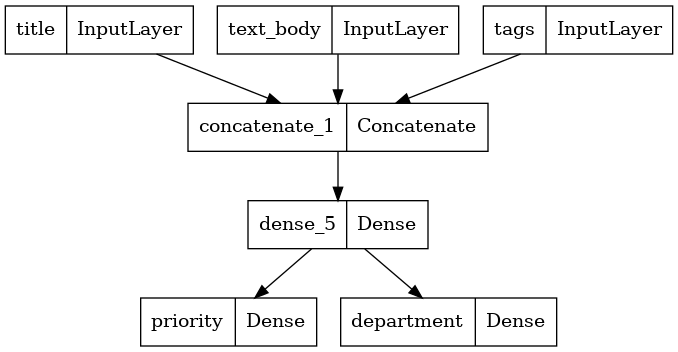

In [20]:
keras.utils.plot_model(model)

In [21]:
model.layers

In [22]:
model.layers[3]

In [24]:
model.layers[3].input

[<KerasTensor: shape=(None, 10000) dtype=float32 (created by layer 'title')>,
 <KerasTensor: shape=(None, 10000) dtype=float32 (created by layer 'text_body')>,
 <KerasTensor: shape=(None, 100) dtype=float32 (created by layer 'tags')>]

In [25]:
model.layers[3].output

<KerasTensor: shape=(None, 20100) dtype=float32 (created by layer 'concatenate_1')>

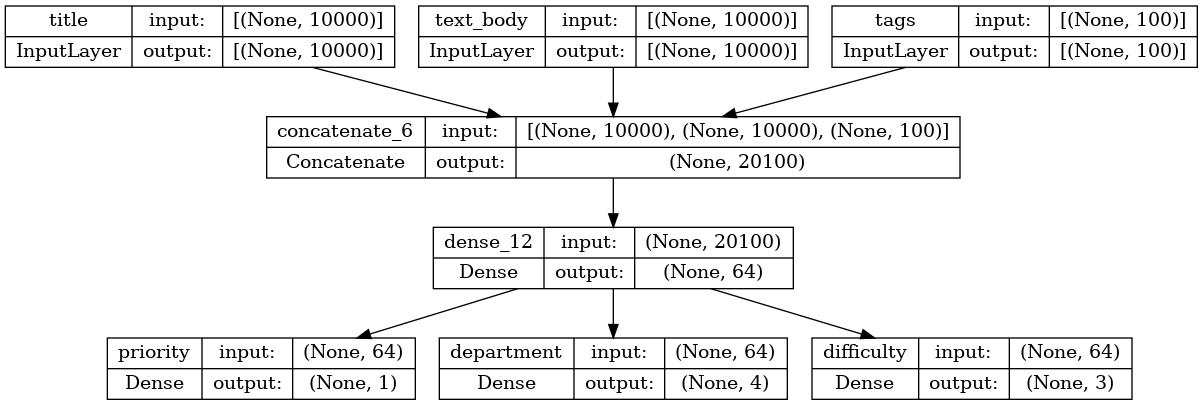

In [35]:
model = create_model(어휘수=10000, 태그수=100, 부서수=4)

features = model.layers[4].output
difficulty = layers.Dense(3, activation='softmax', name='difficulty')(features)
new_outputs = model.outputs + [difficulty]
new_model = keras.Model(inputs=model.inputs, outputs=new_outputs)

keras.utils.plot_model(new_model, show_shapes=True)

# Vision Deep Learning 

In [36]:
from tensorflow.keras.datasets import fashion_mnist

(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

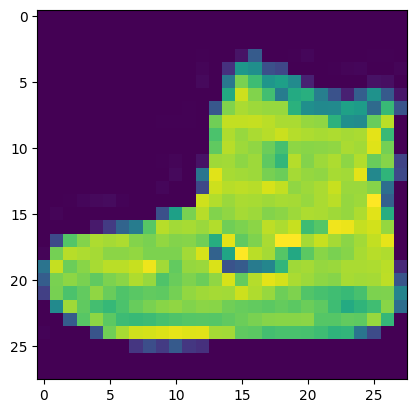

In [37]:
plt.imshow(X_train[0])

In [6]:
def 전처리(X, 목표형상):
    X = X.astype('float32')
    X = X.reshape(-1, *목표형상)
    X /= 255
    return X

In [7]:
전처리(X_train, 목표형상=(784,)).shape

(60000, 784)

In [8]:
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [47]:
np.eye(10)[y_train][:5]

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [43]:
def create_MLP(hidden_units, input_shape=None):
    model = Sequential()
    if input_shape:
        model.add(keras.Input(shape=input_shape))
    for units in hidden_units:
        model.add(layers.Dense(units, activation='relu'))
    return model

In [66]:
from tensorflow.keras import losses, callbacks

mlp = create_MLP(hidden_units=[16], input_shape=(784,))
mlp.add(layers.Dense(10, activation='softmax'))
mlp.summary()

mlp.compile(loss=losses.sparse_categorical_crossentropy, optimizer='adam', metrics=['acc'])
history = mlp.fit(
    전처리(X_train, (784,)), y_train, 
    epochs=50, batch_size=128, validation_split=0.2, callbacks=[
        callbacks.EarlyStopping(monitor='val_loss', patience=3)
    ])

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_37 (Dense)            (None, 16)                12560     
                                                                 
 dense_38 (Dense)            (None, 10)                170       
                                                                 
Total params: 12,730
Trainable params: 12,730
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
375/375 [==============================] - 1s 1ms/step - loss: 0.8066 - acc: 0.7426 - val_loss: 0.5509 - val_acc: 0.8095
Epoch 2/50
375/375 [==============================] - 0s 1ms/step - loss: 0.5049 - acc: 0.8287 - val_loss: 0.5146 - val_acc: 0.8199
Epoch 3/50
375/375 [==============================] - 0s 1ms/step - loss: 0.4639 - acc: 0.8401 - val_loss: 0.4568 - val_acc: 0.8424
Epoch 4/50
375/375 [=============================

<Axes: >

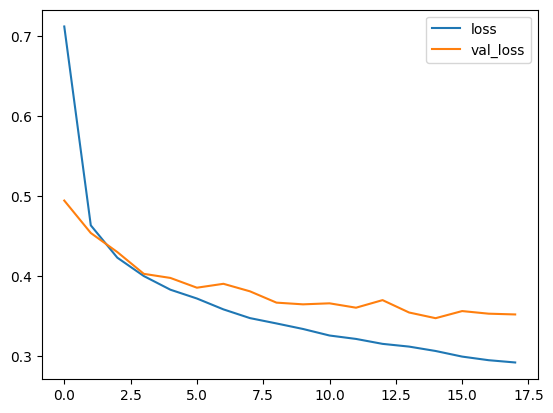

In [65]:
train_results = pd.DataFrame(history.history)
train_results[['loss', 'val_loss']].plot()

In [61]:
train_results[:8]

,loss,acc,val_loss,val_acc
0,0.596626,0.796000,0.450944,0.839000
1,0.411842,0.854125,0.400775,0.858917
2,0.368806,0.867542,0.386864,0.860750
3,0.346278,0.874208,0.430860,0.847167
4,0.330185,0.879729,0.347710,0.873750
5,0.309471,0.886396,0.340137,0.879917
6,0.300230,0.889854,0.353036,0.873750
7,0.291028,0.892521,0.331697,0.879667


In [53]:
loss, acc = mlp.evaluate(전처리(X_test, (784,)), y_test)
print(f'Test: Loss={loss:.3f}, Acc.={acc:.2%}')

313/313 [==============================] - 0s 640us/step - loss: 0.3506 - acc: 0.8770
Test: Loss=0.351, Acc.=87.70%


## 합성곱 신경망

In [90]:
from tensorflow.keras import layers

def create_ConvNet(name):
    model = Sequential(name=name)
    model.add(layers.Conv2D(32, activation='relu', kernel_size=3))
    model.add(layers.MaxPool2D(pool_size=2))
    model.add(layers.Conv2D(64, activation='relu', kernel_size=3))
    model.add(layers.MaxPool2D(pool_size=2))
    model.add(layers.Conv2D(128, activation='relu', kernel_size=3))
    return model

convnet_block = create_ConvNet(name='convnet')

model = Sequential()
# 입력
model.add(keras.Input(shape=(28, 28, 1)))
# 합성곱 블럭
model.add(convnet_block)
# 출력층
model.add(layers.Flatten())
model.add(layers.Dense(10, activation='softmax'))
model.summary()

Model: "sequential_26"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 convnet (Sequential)        (None, 3, 3, 128)         92672     
                                                                 
 flatten_5 (Flatten)         (None, 1152)              0         
                                                                 
 dense_45 (Dense)            (None, 10)                11530     
                                                                 
Total params: 104,202
Trainable params: 104,202
Non-trainable params: 0
_________________________________________________________________


In [91]:
model.compile(loss=losses.sparse_categorical_crossentropy, optimizer='adam', metrics=['acc'])
history = model.fit(
    전처리(X_train, (28, 28, 1)), y_train, 
    epochs=50, batch_size=128, validation_split=0.2, callbacks=[
        callbacks.EarlyStopping(monitor='val_loss', patience=3)
    ])

Epoch 1/50
375/375 [==============================] - 5s 14ms/step - loss: 0.6253 - acc: 0.7722 - val_loss: 0.4392 - val_acc: 0.8449
Epoch 2/50
375/375 [==============================] - 5s 14ms/step - loss: 0.3864 - acc: 0.8628 - val_loss: 0.3824 - val_acc: 0.8633
Epoch 3/50
375/375 [==============================] - 5s 14ms/step - loss: 0.3337 - acc: 0.8811 - val_loss: 0.3272 - val_acc: 0.8786
Epoch 4/50
375/375 [==============================] - 5s 14ms/step - loss: 0.3017 - acc: 0.8916 - val_loss: 0.3354 - val_acc: 0.8777
Epoch 5/50
375/375 [==============================] - 5s 14ms/step - loss: 0.2804 - acc: 0.8986 - val_loss: 0.2974 - val_acc: 0.8932
Epoch 6/50
375/375 [==============================] - 5s 14ms/step - loss: 0.2574 - acc: 0.9060 - val_loss: 0.2852 - val_acc: 0.9007
Epoch 7/50
375/375 [==============================] - 5s 14ms/step - loss: 0.2417 - acc: 0.9119 - val_loss: 0.2747 - val_acc: 0.9019
Epoch 8/50
375/375 [==============================] - 5s 15ms/step - 